In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df=pd.read_csv('loanP_train.csv') #import pandas, numpy, matplotlib libraries and dataset

In [25]:
df.head()

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,145.434256,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df.describe() # look at the summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,599.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,83.097799,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,128.000000,360.000000,1.00000
75%,5807.500000,2279.000000,162.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


In [ ]:
# EXPLORATORY ANALYSIS SECTION

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Graduate'>

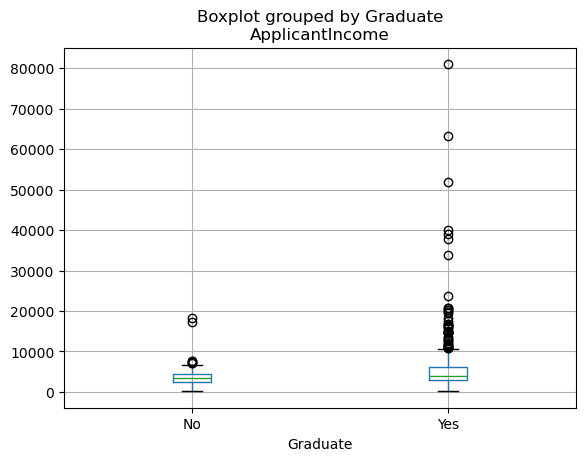

In [27]:
df.boxplot(column='ApplicantIncome', by ='Graduate') # understand data distribution

<Axes: >

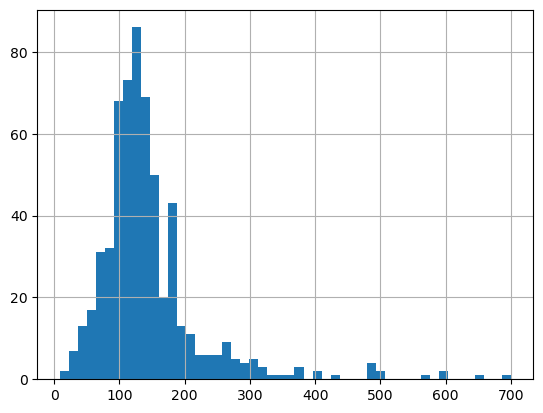

In [28]:
df['LoanAmount'].hist(bins=50) # extreme values

<Axes: >

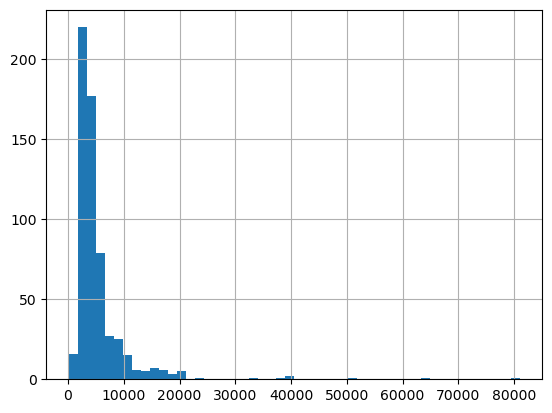

In [30]:
df['ApplicantIncome'].hist(bins=50) # extreme values

In [ ]:
# DATA WRANGLING SECTION

In [34]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# fill in missing values in Loan Amount Term and Credit History
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [42]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# MACHINE LEARNING - LOGISTIC REGRESSION SECTION

In [44]:
# import models from scikit learn module

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [45]:
# extract independent variables
x = df.iloc[:, [8,10]].values # credit history and loan amount

# extract dependent variables
y = df.iloc[:,12].values # loan status

In [46]:
# split dataset into Training and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [47]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [53]:
# fitting logistic regression to training dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [49]:
# predict the test set results
y_pred = classifier.predict(x_test)
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [51]:
# build the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 18,  27],
       [  2, 103]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066666666666666